# Troop Booth Signups Analysis

This notebook loads a CSV file containing troop booth signup events and performs general statistical analysis with a focus on the number of booths (i.e. signup events) per troop. In addition, it identifies potential outliers in the number of booth signups per troop.

The source data is assumed to have the following columns:

- **Troop**
- **Troop Email**
- **Slot Start Time**
- **Slot End Time**
- **When Selected Date**
- **When Selected Time**
- **User Selecting**

Adjust the file path if needed.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Load the Data

The data file is assumed to be stored as `data/troop_booth_signups.csv` (adjust the file path as needed). We assume the file has a header.

In [4]:
# Change the file path as needed
data_file = 'data/2025_booth_signups_unit_trimmed.csv'

# Load the CSV file
df = pd.read_csv(data_file)

# Display the first few rows
df.head()

,Troop,Troop Email,Slot Start Time,Slot End Time,When Selected Date,When Selected Time,User Selecting
0,3822,naldaz08@yahoo.com,2000/01/01 14:00:00,2000/01/01 16:00:00,2025/01/16 20:14:31,2025/01/16 20:14:31,naldaz08@yahoo.com
1,3822,naldaz08@yahoo.com,2000/01/01 16:00:00,2000/01/01 18:00:00,2025/01/16 20:14:31,2025/01/16 20:14:31,naldaz08@yahoo.com
2,3065,j.savage13@hotmail.com,2000/01/01 10:00:00,2000/01/01 12:00:00,2025/01/14 20:02:38,2025/01/14 20:02:38,kaitlyn.redfield@gmail.com
3,3065,j.savage13@hotmail.com,2000/01/01 14:00:00,2000/01/01 16:00:00,2025/01/14 20:03:02,2025/01/14 20:03:02,kaitlyn.redfield@gmail.com
4,3799,azchesko@gmail.com,2000/01/01 10:00:00,2000/01/01 12:00:00,2025/01/14 20:02:12,2025/01/14 20:02:12,azchesko@gmail.com


## 2. Data Preparation

In this section we:

- Convert the time columns to datetime objects.
- (Optionally) combine date and time if needed.
  
For our analysis, we will focus on the number of signup events per troop. (In this dataset each row represents one booth signup event.)

In [5]:
# Convert time columns to datetime
df['Slot Start Time'] = pd.to_datetime(df['Slot Start Time'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
df['Slot End Time'] = pd.to_datetime(df['Slot End Time'], format='%Y/%m/%d %H:%M:%S', errors='coerce')

# Optionally, convert When Selected Date and Time if needed
df['When Selected Date'] = pd.to_datetime(df['When Selected Date'], format='%Y/%m/%d %H:%M:%S', errors='coerce')
df['When Selected Time'] = pd.to_datetime(df['When Selected Time'], format='%Y/%m/%d %H:%M:%S', errors='coerce')

# Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Troop               510 non-null    int64         
 1   Troop Email         510 non-null    object        
 2   Slot Start Time     510 non-null    datetime64[ns]
 3   Slot End Time       510 non-null    datetime64[ns]
 4   When Selected Date  507 non-null    datetime64[ns]
 5   When Selected Time  507 non-null    datetime64[ns]
 6   User Selecting      510 non-null    object        
dtypes: datetime64[ns](4), int64(1), object(2)
memory usage: 28.0+ KB


## 3. Statistical Summary Per Troop

We want to see how many booth signup events each troop has. We will group by the **Troop** column and count the number of rows (each representing one booth signup event). Then we compute descriptive statistics (mean, median, standard deviation, etc.) and also create a boxplot to help identify outliers.

In [6]:
# Group by Troop and count the number of booth signup events per troop
troop_counts = df.groupby('Troop').size().reset_index(name='Num_Booths')

# Display the summary
troop_counts.sort_values('Num_Booths', ascending=False, inplace=True)
print("Booth signup counts per troop:")
print(troop_counts)

# Get descriptive statistics for booth counts
desc_stats = troop_counts['Num_Booths'].describe()
print("\nDescriptive statistics for booth signups per troop:")
print(desc_stats)

Booth signup counts per troop:
    Troop  Num_Booths
20   3829          85
0     872          68
16   3822          59
21   3839          31
12   3475          29
6    2820          22
7    2877          20
15   3819          19
11   3315          19
8    3065          18
17   3824          16
9    3296          16
22   3997          16
13   3630          13
1    2554          11
23   4208          11
19   3828          10
24   7223           9
14   3799           8
5    2674           8
10   3312           6
4    2626           5
25   9670           4
3    2603           3
18   3827           3
2    2570           1

Descriptive statistics for booth signups per troop:
count    26.000000
mean     19.615385
std      20.632163
min       1.000000
25%       8.000000
50%      14.500000
75%      19.750000
max      85.000000
Name: Num_Booths, dtype: float64


## 4. Outlier Detection

We can use the Interquartile Range (IQR) method to detect potential outliers in the number of booth signups per troop. Outliers are typically defined as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

In [7]:
Q1 = troop_counts['Num_Booths'].quantile(0.25)
Q3 = troop_counts['Num_Booths'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Identify outliers
outliers = troop_counts[(troop_counts['Num_Booths'] < lower_bound) | (troop_counts['Num_Booths'] > upper_bound)]
print("\nOutlier troops (based on booth signup counts):")
print(outliers)

Q1: 8.0, Q3: 19.75, IQR: 11.75
Lower bound: -9.625, Upper bound: 37.375

Outlier troops (based on booth signup counts):
    Troop  Num_Booths
20   3829          85
0     872          68
16   3822          59


## 5. Visualization

Below is a boxplot of the booth signup counts per troop. This visualization helps in identifying outliers and understanding the spread of the data.

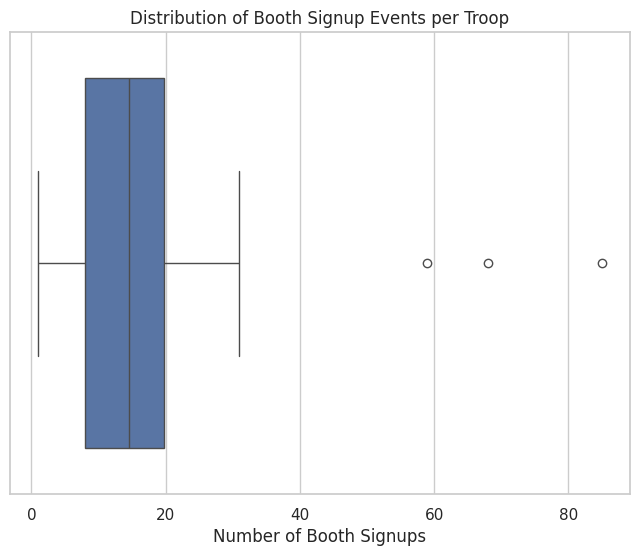

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x=troop_counts['Num_Booths'])
plt.title('Distribution of Booth Signup Events per Troop')
plt.xlabel('Number of Booth Signups')
plt.show()

## 6. Save the Summary Data

Finally, we save the aggregated summary (booth signup counts per troop) to a new CSV file for further reporting or analysis.

In [9]:
output_file = 'troop_booth_summary.csv'
troop_counts.to_csv(output_file, index=False)
print(f"Summary data saved to {output_file}")

Summary data saved to troop_booth_summary.csv


## Conclusion

This notebook has loaded the troop booth signup data, computed the number of signup events per troop, generated descriptive statistics, and used a boxplot along with the IQR method to identify potential outliers. The aggregated summary has also been saved to a CSV file for further use.

Feel free to modify or extend this analysis as needed.